# Upper-Limb Functioning Analysis

This notebooks demonstrates how to use the `ulfunc` package of the ``monalysa`` 
library to quantify different constructs of upper limb functioning.

### To be done (as of Dec 16 2023):
The current tutorial only demonstrates the pitch estimation functions. The future 
updates will demonstrate how to use the other functions in the library.

Contact siva82kb@gmail.com for any queries.

### Install the most recent monalysa library

```python
!pip install monalysa
```

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../../')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pathlib
import pandas as pd

In [4]:
from monalysa import ulfunc

### Demonstration of the vector magnitude based methods
#### UL Use

In [16]:
from monalysa.ulfunc import uluse
fs = 100
t = np.arange(0, 10, 1. / fs)
vmag = np.square(np.sin(2 * t) + np.cos(0.4 * t) + 2) * np.random.rand(len(t))
th1, th2l, th2h = 3, 1, 4
_, u1 = uluse.from_vec_mag(vmag, thresh=th1)
_, u2 = uluse.from_vec_mag_dblth(vmag, thresh_l=th2l, thresh_h=th2h)

8346 8346


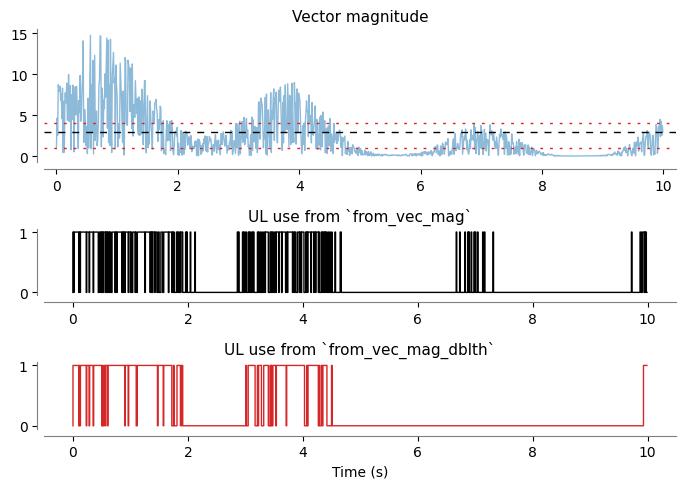

In [22]:
fig = plt.figure(figsize=(7, 5))
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1])
ax0 = plt.subplot(gs[0])
ax0.plot(t, vmag, lw=1, alpha=0.5)
ax0.axhline(th1, lw=1, color='k', ls="dashed", dashes=(5, 5))
ax0.axhline(th2l, lw=1, color='tab:red', ls="dashed", dashes=(2, 5))
ax0.axhline(th2h, lw=1, color='tab:red', ls="dashed", dashes=(2, 5))
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))
ax0.spines['left'].set_color("tab:gray")
ax0.spines['bottom'].set_color("tab:gray")
ax0.set_xlim(-0.2, 10.2)
ax0.set_title("Vector magnitude", fontsize=11)

ax1 = plt.subplot(gs[1])
ax1.step(t, u1, lw=1, color="k")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_position(('outward', 5))
ax1.spines['bottom'].set_position(('outward', 5))
ax1.spines['left'].set_color("tab:gray")
ax1.spines['bottom'].set_color("tab:gray")
ax1.set_title("UL use from `from_vec_mag`", fontsize=11)

ax2 = plt.subplot(gs[2])
ax2.step(t, u2, lw=1, color="tab:red")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_position(('outward', 5))
ax2.spines['bottom'].set_position(('outward', 5))
ax2.spines['left'].set_color("tab:gray")
ax2.spines['bottom'].set_color("tab:gray")
ax2.set_xlabel("Time (s)")
ax2.set_title("UL use from `from_vec_mag_dblth`", fontsize=11)

plt.tight_layout()

fig.savefig("uluse_from_vec_mag.svg", format="svg")

#### Ul Intensity and averages

In [23]:
from monalysa.ulfunc import uluse
from monalysa.ulfunc import ulint
fs = 100
t = np.arange(0, 10, 1. / fs)
vmag = np.square(np.sin(2 * t) + np.cos(0.4 * t) + 2) * np.random.rand(len(t))
th1, th2l, th2h = 3, 1, 4
_, u1 = uluse.from_vec_mag(vmag, thresh=th1)
_, u2 = uluse.from_vec_mag_dblth(vmag, thresh_l=th2l, thresh_h=th2h)
_, i1 = ulint.from_vec_mag(vmag, u1, 1)
_, i2 = ulint.from_vec_mag(vmag, u2, 1)
_inx1, avgi1 = ulint.average_intuse(i1, u1, windur=0.25, winshift=0.05, fs=fs)
_inx2, avgi2 = ulint.average_intuse(i2, u2, windur=0.25, winshift=0.05, fs=fs)

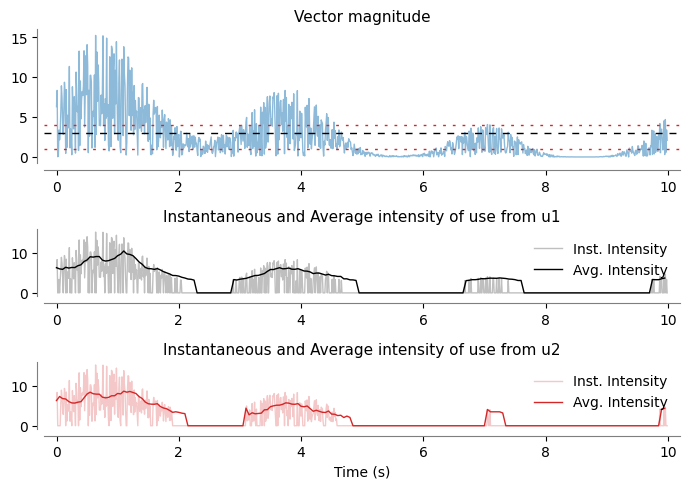

In [24]:
fig = plt.figure(figsize=(7, 5))
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1])
ax0 = plt.subplot(gs[0])
ax0.plot(t, vmag, lw=1, alpha=0.5)
ax0.axhline(th1, lw=1, color='k', ls="dashed", dashes=(5, 5))
ax0.axhline(th2l, lw=1, color='tab:red', ls="dashed", dashes=(2, 5))
ax0.axhline(th2h, lw=1, color='tab:red', ls="dashed", dashes=(2, 5))
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))
ax0.spines['left'].set_color("tab:gray")
ax0.spines['bottom'].set_color("tab:gray")
ax0.set_xlim(-0.2, 10.2)
ax0.set_title("Vector magnitude", fontsize=11)

ax1 = plt.subplot(gs[1])
ax1.plot(t, i1, lw=1, color="k", alpha=0.25, label="Inst. Intensity")
ax1.plot(t[_inx1], avgi1, lw=1, color="k", alpha=1, label="Avg. Intensity")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_position(('outward', 5))
ax1.spines['bottom'].set_position(('outward', 5))
ax1.spines['left'].set_color("tab:gray")
ax1.spines['bottom'].set_color("tab:gray")
ax1.legend(loc="upper right", frameon=False, fontsize=10)
ax1.set_xlim(-0.2, 10.2)
ax1.set_title("Instantaneous and Average intensity of use from u1", fontsize=11)

ax2 = plt.subplot(gs[2])
ax2.plot(t, i2, lw=1, color="tab:red", alpha=0.25, label="Inst. Intensity")
ax2.plot(t[_inx2], avgi2, lw=1, color="tab:red", alpha=1, label="Avg. Intensity")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_position(('outward', 5))
ax2.spines['bottom'].set_position(('outward', 5))
ax2.spines['left'].set_color("tab:gray")
ax2.spines['bottom'].set_color("tab:gray")
ax2.set_xlabel("Time (s)")
ax2.legend(loc="upper right", frameon=False, fontsize=10)
ax2.set_xlim(-0.2, 10.2)
ax2.set_title("Instantaneous and Average intensity of use from u2", fontsize=11)

plt.tight_layout()

fig.savefig("uluse_vec_mag_int.svg", format="svg")

In [25]:
from monalysa.ulfunc import uluse
from monalysa.ulfunc import ulint
from monalysa.ulfunc import measures
fs = 100
t = np.arange(0, 10, 1. / fs)
vmag = np.square(np.sin(2 * t) + np.cos(0.4 * t) + 2) * np.random.rand(len(t))
th2l, th2h = 1, 4
_, _use = uluse.from_vec_mag_dblth(vmag, thresh_l=th2l, thresh_h=th2h)
_, _int = ulint.from_vec_mag(vmag, _use, 1)
_inxu, _avgu = uluse.average_uluse(_use, windur=0.25, winshift=0.05, fs=fs)
_inxi, _avgi = ulint.average_intuse(_int, _use, windur=0.25, winshift=0.05, fs=fs)
_inxa, _avga = ulint.average_ulactivity(_int, windur=0.25, winshift=0.05, fs=fs)

In [26]:
_inxa, _avga = ulint.average_ulactivity(_int, windur=0.25, winshift=0.05, fs=fs)

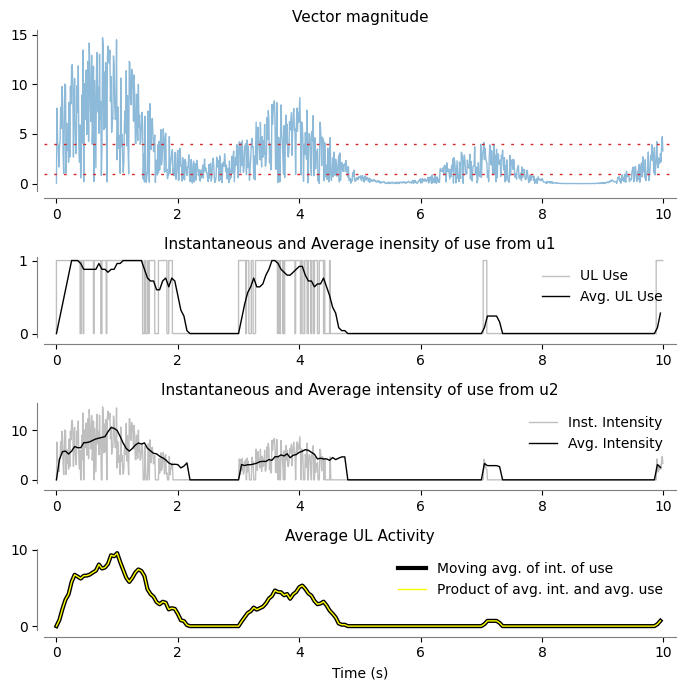

In [27]:
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(4, 1, height_ratios=[2, 1, 1, 1])
ax0 = plt.subplot(gs[0])
ax0.plot(t, vmag, lw=1, alpha=0.5)
ax0.axhline(th2l, lw=1, color='tab:red', ls="dashed", dashes=(2, 5))
ax0.axhline(th2h, lw=1, color='tab:red', ls="dashed", dashes=(2, 5))
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))
ax0.spines['left'].set_color("tab:gray")
ax0.spines['bottom'].set_color("tab:gray")
ax0.set_xlim(-0.2, 10.2)
ax0.set_title("Vector magnitude", fontsize=11)

ax1 = plt.subplot(gs[1])
ax1.step(t, _use, lw=1, color="k", alpha=0.25, label="UL Use")
ax1.plot(t[_inxu], _avgu, lw=1, color="k", alpha=1, label="Avg. UL Use")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_position(('outward', 5))
ax1.spines['bottom'].set_position(('outward', 5))
ax1.spines['left'].set_color("tab:gray")
ax1.spines['bottom'].set_color("tab:gray")
ax1.legend(loc="upper right", frameon=False, fontsize=10)
ax1.set_xlim(-0.2, 10.2)
ax1.set_title("Instantaneous and Average inensity of use from u1", fontsize=11)

ax2 = plt.subplot(gs[2])
ax2.plot(t, _int, lw=1, color="k", alpha=0.25, label="Inst. Intensity")
ax2.plot(t[_inxi], _avgi, lw=1, color="k", alpha=1, label="Avg. Intensity")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_position(('outward', 5))
ax2.spines['bottom'].set_position(('outward', 5))
ax2.spines['left'].set_color("tab:gray")
ax2.spines['bottom'].set_color("tab:gray")
ax2.legend(loc="upper right", frameon=False, fontsize=10)
ax2.set_xlim(-0.2, 10.2)
ax2.set_title("Instantaneous and Average intensity of use from u2", fontsize=11)

ax3 = plt.subplot(gs[3])
ax3.plot(t[_inxa], _avga, lw=3, color="k", alpha=1, label="Moving avg. of int. of use")
ax3.plot(t[_inxa], _avgi * _avgu, lw=1, color="yellow", alpha=1, label="Product of avg. int. and avg. use")
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_position(('outward', 5))
ax3.spines['bottom'].set_position(('outward', 5))
ax3.spines['left'].set_color("tab:gray")
ax3.spines['bottom'].set_color("tab:gray")
ax3.set_xlabel("Time (s)")
ax3.legend(loc="upper right", frameon=False, fontsize=10)
ax3.set_xlim(-0.2, 10.2)
ax3.set_title("Average UL Activity", fontsize=11)

plt.tight_layout()

fig.savefig("uluse_vec_mag_act.svg", format="svg")

#### UL functioning measures

In [28]:
from monalysa.ulfunc import uluse
from monalysa.ulfunc import ulint
from monalysa.ulfunc import measures
np.random.seed(0)
fs = 100
t = np.arange(0, 10, 1. / fs)
vmag = np.square(np.sin(2 * t) + np.cos(0.4 * t) + 2) * np.random.rand(len(t))
th2l, th2h = 1, 4
_, _use = uluse.from_vec_mag_dblth(vmag, thresh_l=th2l, thresh_h=th2h)
_, _int = ulint.from_vec_mag(vmag, _use, 1)
_inxu, _avgu = uluse.average_uluse(_use, windur=0.25, winshift=0.05, fs=fs)
_inxi, _avgi = ulint.average_intuse(_int, _use, windur=0.25, winshift=0.05, fs=fs)
_inxa, _avga = ulint.average_ulactivity(_int, windur=0.25, winshift=0.05, fs=fs)
measures.Hq(_avga, q=90)

6.128198834355528

In [29]:
from monalysa.ulfunc import uluse
from monalysa.ulfunc import ulint
from monalysa.ulfunc import measures
np.random.seed(0)
fs = 100
t = np.arange(0, 12, 1. / fs)
_intr = (np.sin(t) + 1) * (t > 2.0) * np.random.rand(len(t))
_intr[400:500] = 0
_intl = (np.sin(t - np.pi) + 1) * (t < 8.0) * np.random.rand(len(t))
_intl[400:500] = 0
_, _linxinst = measures.instantaneous_latindex(_intr, _intl)
_inxl, _avgli = measures.average_latindex(_linxinst, windur=0.25, winshift=0.05, fs=fs)

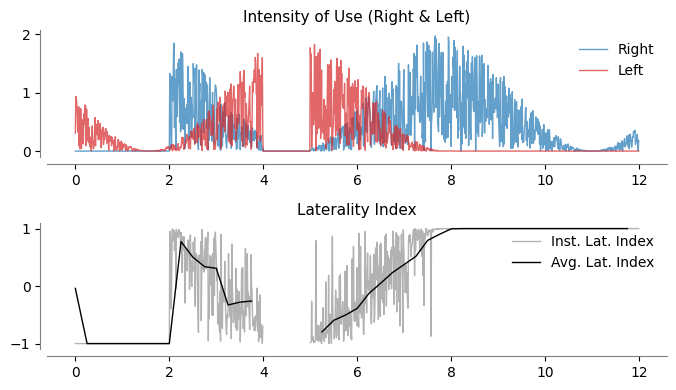

In [30]:
fig = plt.figure(figsize=(7, 4))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax0.plot(t, _intr, lw=1, alpha=0.7, color="tab:blue", label="Right")
ax0.plot(t, _intl, lw=1, alpha=0.7, color="tab:red", label="Left")
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))
ax0.spines['left'].set_color("tab:gray")
ax0.spines['bottom'].set_color("tab:gray")
ax0.set_title("Intensity of Use (Right & Left)", fontsize=11)
ax0.legend(loc="upper right", frameon=False, fontsize=10)

ax2 = plt.subplot(gs[1])
ax2.plot(t, _linxinst, lw=1, color="k", alpha=0.3, label="Inst. Lat. Index")
ax2.plot(t[_inxl], _avgli, lw=1, color="k", label="Avg. Lat. Index")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_position(('outward', 5))
ax2.spines['bottom'].set_position(('outward', 5))
ax2.spines['left'].set_color("tab:gray")
ax2.spines['bottom'].set_color("tab:gray")
ax2.set_title("Laterality Index", fontsize=11)
ax2.legend(loc="upper right", frameon=False, fontsize=10)

plt.tight_layout()

fig.savefig("latinx.svg", format="svg")

### Demonstration of the GMAC measure

In [39]:
# Data directory.
datadir = pathlib.Path("../../../data/ag_data/")

# Read the accelerometer data.
fs = 100.
accl_data = pd.read_csv(datadir / "accl_pitch.csv", sep=",")
t = np.arange(0, len(accl_data) / fs, 1. / fs)

#### Pitch angle estimation from a forearm arccelerometer data

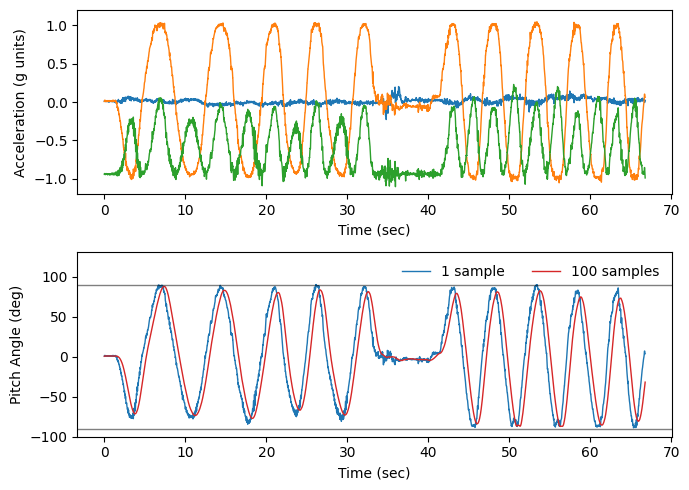

In [40]:
fs = 100

# Estimate the pitch angle from `estimate_accl_pitch`.
# The y-axis of the accelerometer points in the direction of the forearm, 
# pointing aware from the elbow joint.
pitch1 = ulfunc.uluse.estimate_accl_pitch(accl_data.values, fs=fs,
                                          accl_farm_inx=1,
                                          elb_to_farm=True,
                                          nwin=None)
pitch2 = ulfunc.uluse.estimate_accl_pitch(accl_data.values, fs=fs,
                                          accl_farm_inx=1,
                                          elb_to_farm=True,
                                          nwin=1)


fig = plt.figure(figsize=(7, 5))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])
ax = plt.subplot(gs[0])
ax.plot(t, accl_data.values, lw=1, alpha=1)
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Acceleration (g units)")
ax.set_ylim(-1.2, 1.2)

ax = plt.subplot(gs[1])
ax.plot(t, pitch2, lw=1, color="tab:blue", label="1 sample")
ax.plot(t, pitch1, lw=1, color="tab:red", label=f"{fs:.0f} samples")
ax.axhline(-90, lw=1, color='k', alpha=0.5)
ax.axhline(90, lw=1, color='k', alpha=0.5)
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Pitch Angle (deg)")
ax.set_ylim(-100, 130)
ax.legend(loc=1, frameon=False, ncols=2)

plt.tight_layout()

#### Acceleration magnitude estimation from a forearm arccelerometer data

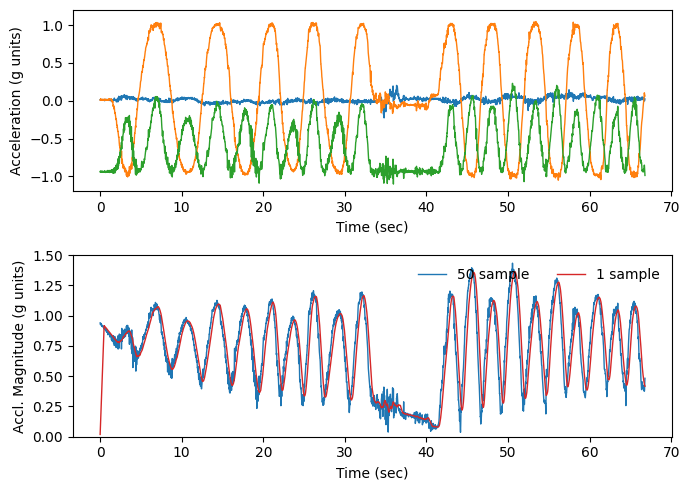

In [44]:
# Estimate the acceleration magnitude from `estimate_accl_mag`.
amag1 = ulfunc.uluse.estimate_accl_mag(accl_data.values, fs=fs, fc=0.01, nc=2,
                                       nam=None)
amag2 = ulfunc.uluse.estimate_accl_mag(accl_data.values, fs=fs, fc=0.01, nc=2,
                                       nam=1)

fig = plt.figure(figsize=(7, 5))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])
ax = plt.subplot(gs[0])
ax.plot(t, accl_data.values, lw=1, alpha=1)
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Acceleration (g units)")
ax.set_ylim(-1.2, 1.2)

ax = plt.subplot(gs[1])
ax.plot(t, amag2, lw=1, color="tab:blue", label=f"{fs/2:.0f} sample")
ax.plot(t, amag1, lw=1, color="tab:red", label="1 sample")
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Accl. Magnitude (g units)")
ax.set_ylim(0, 1.5)
ax.legend(loc=1, frameon=False, ncols=2)

plt.tight_layout()

#### Detection UL use from a forearm arccelerometer data

6680 6680


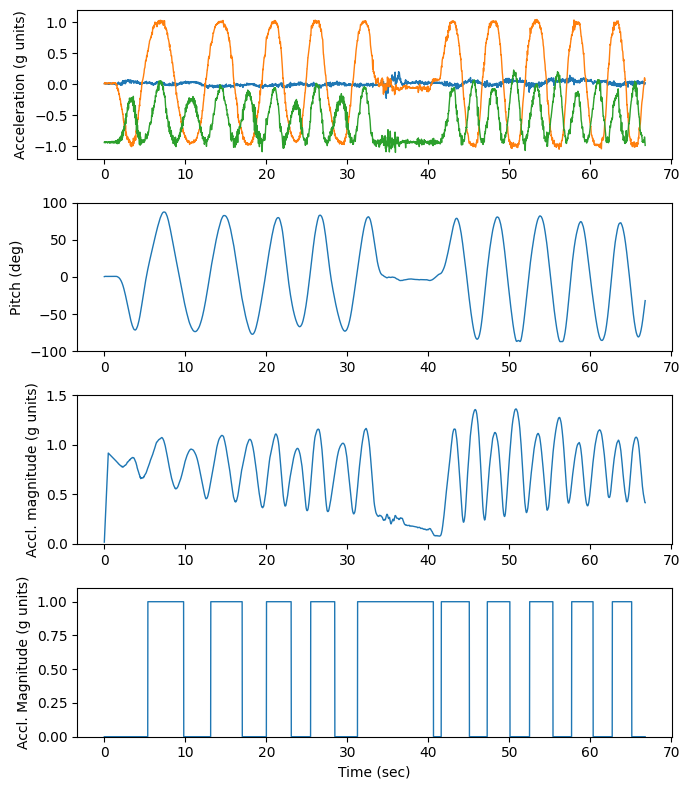

In [48]:
_, u1, p1, am1 = ulfunc.uluse.from_gmac(accl_data.values, fs=fs,
                                        accl_farm_inx=1, elb_to_farm=True)

fig = plt.figure(figsize=(7, 8))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 1])
ax = plt.subplot(gs[0])
ax.plot(t, accl_data.values, lw=1, alpha=1)
ax.set_ylabel("Acceleration (g units)")
ax.set_ylim(-1.2, 1.2)

ax = plt.subplot(gs[1])
ax.plot(t, p1, lw=1, alpha=1)
ax.set_ylabel("Pitch (deg)")
ax.set_ylim(-100, 100)

ax = plt.subplot(gs[2])
ax.plot(t, am1, lw=1, alpha=1)
ax.set_ylabel("Accl. magnitude (g units)")
ax.set_ylim(0, 1.5)

ax = plt.subplot(gs[3])
ax.plot(t, u1, lw=1, color="tab:blue")
# ax.plot(t, amag1, lw=1, color="tab:red", label="1 sample")
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Accl. Magnitude (g units)")
ax.set_ylim(0, 1.1)
# ax.legend(loc=1, frameon=False, ncols=2)

plt.tight_layout()

In [70]:
from monalysa.ulfunc import uluse
fs = 50 # sampling frequency
T = 60 # total number of seconds
t = np.arange(0, T, 1/fs)
ax = 0.5 * np.sin(0.2 * 2 * np.pi * t)
ay = 0.1 * np.sin(0.05 * 2 * np.pi * t)
az = 0.8 * np.sin(0.02 * 2 * np.pi * t) + 0.01
accl = np.array([ax, ay, az]).T
accl_farm_inx = 0   # index of the column with acceleration along the forearm 
elb_to_farm = True  # axis points from elbow to forearm
_, use, pitch, amag = uluse.from_gmac(accl, fs=fs, accl_farm_inx=accl_farm_inx,
                                   elb_to_farm=elb_to_farm)
print("Pitch: ", pitch)
print("Accl. mag: ", amag)
print("Use (GMAC): ", use)

3000 3000
Pitch:  [  0.          29.71040273  46.24725865 ... -21.63656029 -21.01257394
 -20.37245668]
Accl. mag:  [3.99644727e-04 1.09427227e-03 2.24360867e-03 ... 7.68940311e-01
 7.66124033e-01 7.63457863e-01]
Use (GMAC):  [0. 0. 0. ... 0. 0. 0.]


FileNotFoundError: [Errno 2] No such file or directory: '../source/_static/gmac_use.svg'

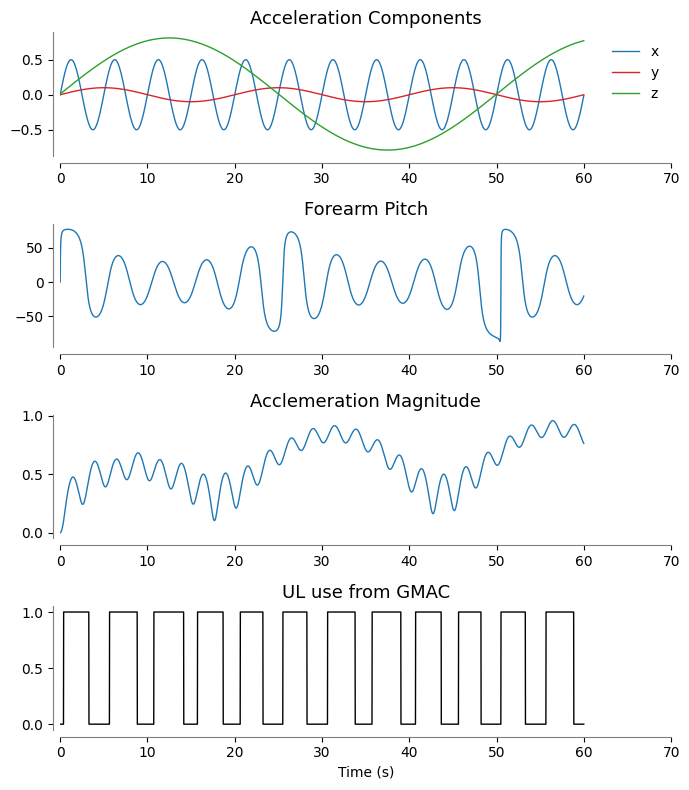

In [93]:
fig  = plt.figure(figsize=(7, 8))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 1])
ax0 = plt.subplot(gs[0])
ax0.plot(t, ax, lw=1, alpha=1, color="tab:blue", label="x")
ax0.plot(t, ay, lw=1, alpha=1, color="tab:red", label="y")
ax0.plot(t, az, lw=1, alpha=1, color="tab:green", label="z")
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))
ax0.spines['left'].set_color("tab:gray")
ax0.spines['bottom'].set_color("tab:gray")
ax0.set_title("Acceleration Components", fontsize=13)
ax0.set_xlim(0., 70)
ax0.legend(loc="upper right", frameon=False, fontsize=10)

ax0 = plt.subplot(gs[1])
ax0.plot(t, pitch, lw=1, alpha=1, color="tab:blue")
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))
ax0.spines['left'].set_color("tab:gray")
ax0.spines['bottom'].set_color("tab:gray")
ax0.set_title("Forearm Pitch", fontsize=13)
ax0.set_xlim(0., 70)

ax0 = plt.subplot(gs[2])
ax0.plot(t, amag, lw=1, alpha=1, color="tab:blue")
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))
ax0.spines['left'].set_color("tab:gray")
ax0.spines['bottom'].set_color("tab:gray")
ax0.set_title("Acclemeration Magnitude", fontsize=13)
ax0.set_xlim(0., 70)

ax0 = plt.subplot(gs[3])
ax0.plot(t, use, lw=1, alpha=1, color="black")
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))
ax0.spines['left'].set_color("tab:gray")
ax0.spines['bottom'].set_color("tab:gray")
ax0.set_title("UL use from GMAC", fontsize=13)
ax0.set_xlim(0., 70)
ax0.set_xlabel("Time (s)")

plt.tight_layout()

# Save as svg
fig.savefig("../_static/gmac_use.svg", format="svg")